# Pre-entrega
Nombre y apellido:

# Etapa 1

## Script básico
Actividades 2 y 3

In [ ]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'notebook', 'precio': 1500.0, 'cantidad': 3},
  {'producto': 'monitor', 'precio': 500.0, 'cantidad': 5},
  {'producto': 'mouse', 'precio': 20.0, 'cantidad': 15}
]

In [ ]:
# Calculamos las ventas acumuladas - map


In [ ]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum([venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

## Import Datasets
Actividad 1

In [460]:
import pandas as pd

In [461]:
# Import dataset ventas
df_ventas = pd.read_csv("https://raw.githubusercontent.com/jrigottiedu/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/ventas.csv")

In [462]:
# Import dataset clientes
df_clientes = pd.read_csv("https://raw.githubusercontent.com/jrigottiedu/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/clientes.csv")

In [463]:
# Import dataset marketing
df_marketing = pd.read_csv("https://raw.githubusercontent.com/jrigottiedu/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/marketing.csv")

In [ ]:
df_ventas

## Dataframe ventas

### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [464]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [465]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [466]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
2640,514,Jarrón decorativo,$59.63,10.0,12/11/2024,Decoración
2258,2331,Parlantes Bluetooth,$26.24,6.0,23/09/2024,Electrónica
434,2992,Smartphone,$116.25,8.0,20/02/2024,Electrónica
846,439,Lámpara de mesa,$35.43,2.0,06/04/2024,Decoración
1351,1719,Batidora,$106.81,10.0,29/05/2024,Electrodomésticos


In [467]:
# Analizamos el campo precio
# Si es numericos se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
1339,$27.43
1747,$47.15
1840,$59.08
2301,$56.98
2708,$40.01


In [468]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
1846,8.0
2982,2.0
1919,1.0
1150,10.0
363,6.0


In [469]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
1308,25/05/2024
220,26/01/2024
825,05/04/2024
930,13/04/2024
2120,06/09/2024


In [470]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


### Calidad de datos
Actividad 5

In [471]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [472]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="producto")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
833,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
857,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
868,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
...,...,...,...,...,...,...
854,2108,SmartWatch,$79.37,10.0,06/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
825,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
877,2373,Smartphone,$123.60,12.0,07/04/2024,Electrónica


In [473]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [474]:
# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


### Observaciones




* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [475]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [476]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [477]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
36,3.16
0,4.81
58,5.69
61,6.00
29,6.24


In [478]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
21,30/05/2024
57,28/08/2024
79,11/11/2024
56,27/08/2024
5,01/04/2024


In [479]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
34,03/09/2024
74,08/12/2024
56,11/10/2024
51,26/09/2024
29,12/08/2024


### Calidad de los datos


In [480]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

### Observaciones
* 90 registros
* 6 columnas
* Registros duplicados: no se observan
* Datos nulos: no se obserban
* campo costo: OK
* campo fecha_inicio: dtype objet, convertir a datetime
* campo fecha_fin: dtype objet, convertir a datetime

## Dataframe clientes

### Analisis exploratorio de datos

### Observaciones

# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [481]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [482]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [483]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [484]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [485]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [486]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
2565,108.76
2064,47.46
1555,72.74


In [487]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)

In [488]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [489]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [490]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [491]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype

dtype('<M8[ns]')

In [492]:
# Validamos
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 164.0+ KB


### Dataframe marketing

Convertir a datetime fecha_inicio / fecha_fin

In [493]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [494]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [495]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


## Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [ ]:
df_ventas.head(2)

In [496]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]

In [497]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [498]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [499]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


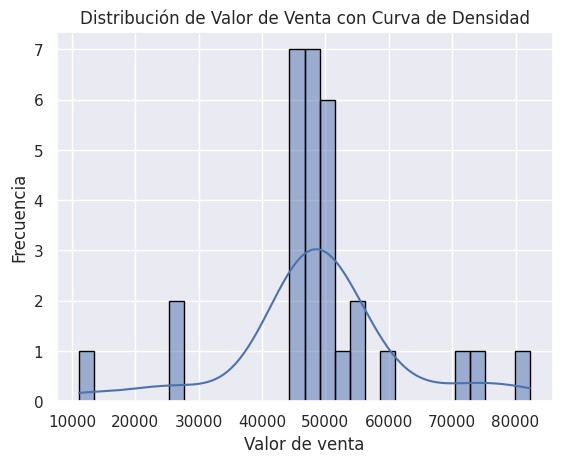

In [500]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [501]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [502]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [503]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [504]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [ ]:
df_ventas.info()

In [ ]:
df_marketing.info()

### Unimos los dataframes ventas con marketing

In [ ]:
# Hacemos el merge entre marketing y ventas por columna producto
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
print("Cantidad de registros: ", len(ventas_marketing))

In [ ]:
# Visualizemos algunos registros luego del merge (ordenados por producto, id_venta)
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

In [ ]:
# Visualizamos algunos registros, pero ordenamos por fecha_venta
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["valor_venta"], ascending=False).head(6)

Luego del merge encontramos:

* Aparecen ventas duplicadas, por ejemplo los primeros 3 registros con id_venta 2063, dado que ese producto tuvo 3 campañas de marketing, pero para este caso fue vendido fuera del período de marketing.
* Y ver el caso de los últimos 3 registros con id_venta 1109, dos de ellos dentro y uno fuera del período



Por ello, vamos a generar dos nuevos dataframes, uno con aquellas ventas dentro del período de marketing, y otro fuera del período

### Ventas dentro de la campaña

In [ ]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña de marketing
ventas_con_marketing = ventas_marketing.query("fecha_venta >= fecha_inicio & fecha_venta <= fecha_fin")
print("Cantidad de registros dentro de la campaña: ", len(ventas_con_marketing))

In [ ]:
# Visualicemos algunos de los registros de ventas durante la campaña de marketing
ventas_con_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

In [ ]:
# Como vemos algunos duplicados, listemos solo esos
ventas_con_marketing_duplicados = ventas_con_marketing[ventas_con_marketing.duplicated(subset="id_venta",keep=False)]
ventas_con_marketing_duplicados[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


Los registros con id_venta duplicados nos impiden agrupar directamente por producto, debemos antes agrupar por [id_venta, producto] quedarnos con el primer valor_venta y hacer la suma de los costos de marketing.
<BR>
Luego si agrupamos por producto, para saber el monto total de venta para cada uno.

In [ ]:
# Entonces grupamos primero por id_venta y producto
# de esa particion, nos quedamos con la primera venta y la suma de los costos de marketing
ventas_con_marketing_agg1 = ventas_con_marketing.groupby(["id_venta","producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first"),
    costo_agg=("costo", "sum")
)

print("Cantidad de registros con id_venta únicos: ", len(ventas_con_marketing_agg1))

In [ ]:
# Verificamos la consistencia de los montos, ventas y costos de marketing
ventas_con_marketing_agg1[["id_venta","producto", "valor_venta", "costo_agg"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


In [ ]:
# En la segunda agregacion, agrupamos solo por producto,
ventas_con_marketing_agg2 = ventas_con_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_cm=("valor_venta", "sum"),
    costo_marketing=("costo_agg", "sum")
)

# Agregamos otra columna con la ganancia
ventas_con_marketing_agg2["ganacia_producto_cm"]= ventas_con_marketing_agg2["ventas_producto_cm"]-ventas_con_marketing_agg2["costo_marketing"]

# Finalmente, ordenamos y guardamos en el dataframe final
ventas_con_marketing_final = ventas_con_marketing_agg2.sort_values(by=["ganacia_producto_cm"], ascending=False)

In [ ]:
# Dataframe resultante
ventas_con_marketing_final.head(5)

### Ventas fuera de la campaña de marketing

In [ ]:
# filtramos solo aquellos productos que se hayan vendido fuera de la campaña
ventas_sin_marketing = ventas_marketing.query("(fecha_venta < fecha_inicio) | (fecha_venta > fecha_fin)")
print("Cantidad de registros fuera de la campaña: ", len(ventas_sin_marketing))

In [ ]:
ventas_sin_marketing[["id_venta","producto", "valor_venta", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["id_venta","producto"], ascending=True).head(6)

In [ ]:
# Aquí también hay id_venta duplicados, así que procedemos igual que antes, agrupando primero por id_venta y producto
# y luego solo por producto
ventas_sin_marketing_agg1 = ventas_sin_marketing.groupby(["id_venta", "producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first")
)
print(len(ventas_sin_marketing_agg1))

ventas_sin_marketing_agg2 = ventas_sin_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_sm=("valor_venta", "sum")
)

# Ordenamos y guardamos en el dataframe final
ventas_sin_marketing_final = ventas_sin_marketing_agg2[["producto", "ventas_producto_sm"]].sort_values(by=["ventas_producto_sm"], ascending=False)

In [ ]:
ventas_sin_marketing_final.head(5)

### Graficamos ventas y costos de marketing apilado

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto

# Estilos
sns.set_theme(
    style="whitegrid",
    palette="Set3",
    context="notebook")
plt.figure(figsize=(10,6))

# Primer nivel (abajo)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["ventas_producto_cm"], label="Ventas")

# Segundo nivel (arriba)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["costo_marketing"],
        bottom=ventas_con_marketing_final["ventas_producto_cm"],
        label="Costo Marketing")


plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Entrega Final

# Etapa 3 - Análisis de Datos

Objetivo: Realizar análisis estadístico y exploratorio sobre los datos procesados.
sobre:
* df_ventas
* df_marketing

## 1 - Estadística Descriptiva

Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe

En la Etapa 2 - Limpieza de datos, obtuvimos los dataframes:

* df_ventas
* df_marketing

Usamos el método describe para obtener un resumen de las:
* Medidas de posición
* Medidas de dispersión o variabilidad


In [506]:
# Dataframe ventas
df_ventas[["precio", "cantidad", "valor_venta"]].describe()
# df_ventas.describe()

,precio,cantidad,valor_venta
count,2998.000000,2998.000000,2998.000000
mean,75.291318,6.502668,489.357412
std,28.736008,3.455107,334.281817
min,26.000000,1.000000,26.300000
25%,50.030000,3.000000,220.920000
50%,75.205000,7.000000,418.065000
75%,100.067500,9.000000,709.920000
max,124.970000,12.000000,1488.120000


In [508]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [509]:
# Dataframe marketing
df_marketing.groupby("canal")["costo"].describe()

,count,mean,std,min,25%,50%,75%,max
canal,,,,,,,,
Email,30.0,4.840000,0.898773,2.95,4.2125,4.895,5.5075,6.84
RRSS,30.0,5.030333,0.894101,3.16,4.5600,5.130,5.5425,7.16
TV,30.0,4.915667,1.063215,3.06,4.3725,4.795,5.5400,7.39


## 2 - EDA (Análisis Exploratorio de Datos)

Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

### Gráficos histogramas

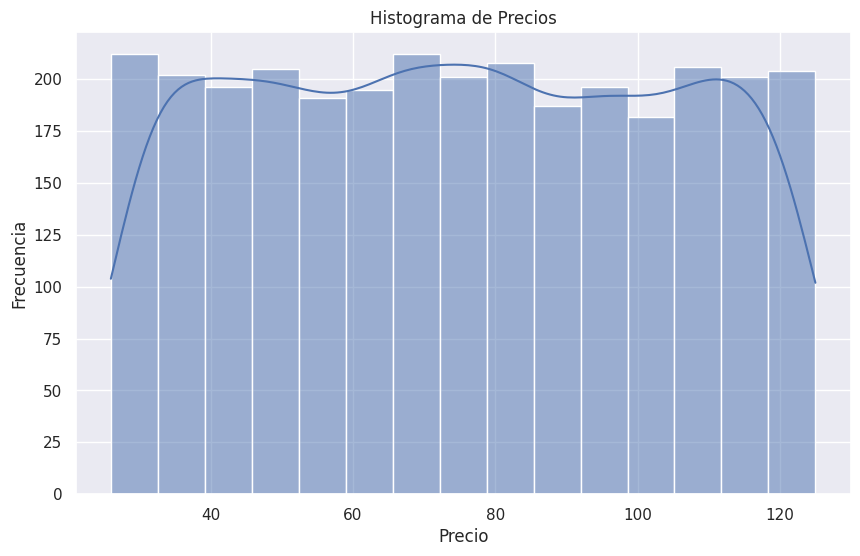

In [510]:
# Histograma de precios

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="precio", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

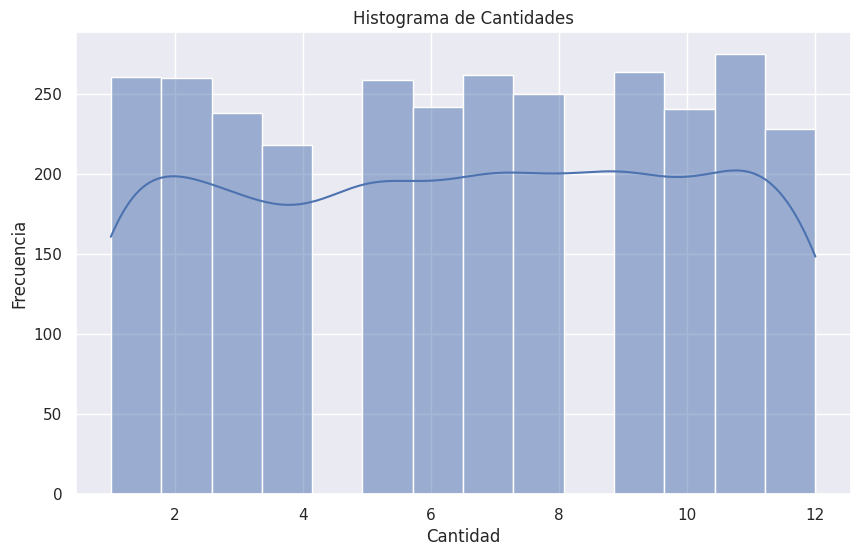

In [512]:
# Histograma cantidades

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="cantidad", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Cantidades")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()


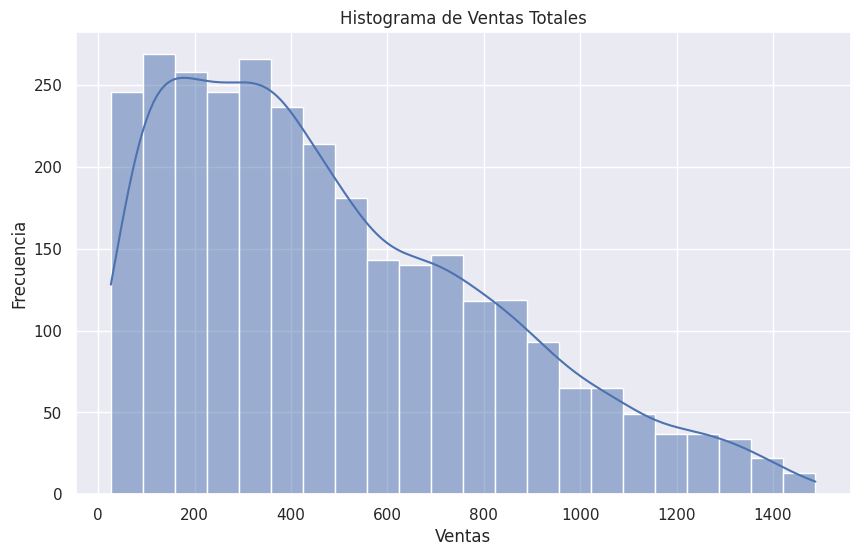

In [513]:
# Histograma ventas_totales

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="valor_venta", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()



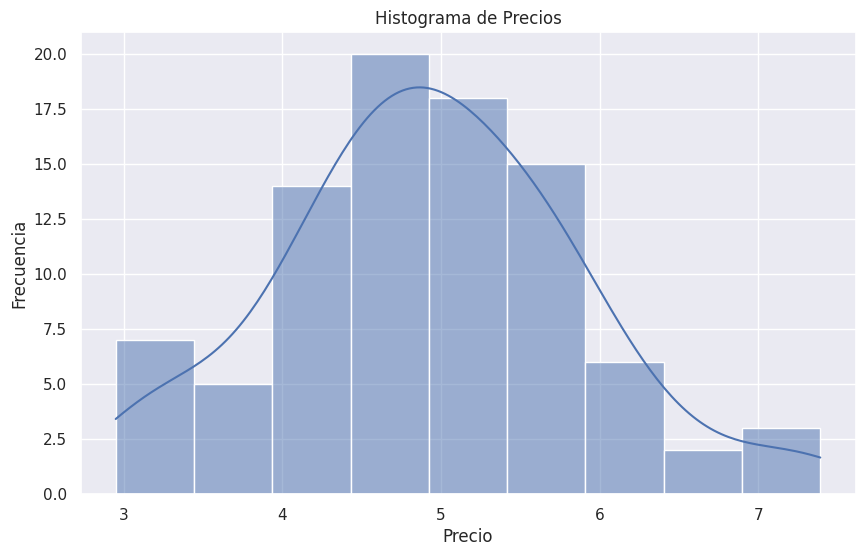

In [514]:
# Histograma costo marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_marketing, x="costo", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


### Gráficos Boxplot

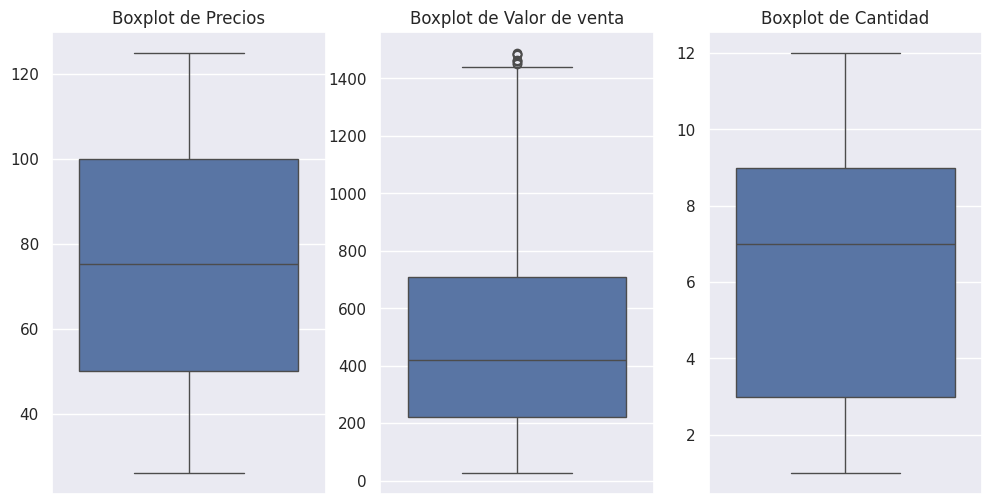

In [518]:
# Boxplot Ventas

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6)) #ancho x alto = resolucion

# Subplots, dividen al lienzo en partes
plt.subplot(1,3,1) # (1,3,1) => (1 fila, 3 columans, bloque 1)

# Subplot 1
sns.boxplot(data=df_ventas, y="precio")
plt.title("Boxplot de Precios")
plt.ylabel("")

# Subplot 2
plt.subplot(1,3,2) # (1,3,2) => (1 fila, 3 columans, bloque 2)
sns.boxplot(data=df_ventas, y="valor_venta")
plt.title("Boxplot de Valor de venta")
plt.ylabel("")


# Subplot 3
plt.subplot(1,3,3) # (1,3,3) => (1 fila, 3 columans, bloque 3)
sns.boxplot(data=df_ventas, y="cantidad")
plt.title("Boxplot de Cantidad")
plt.ylabel("")

plt.show()



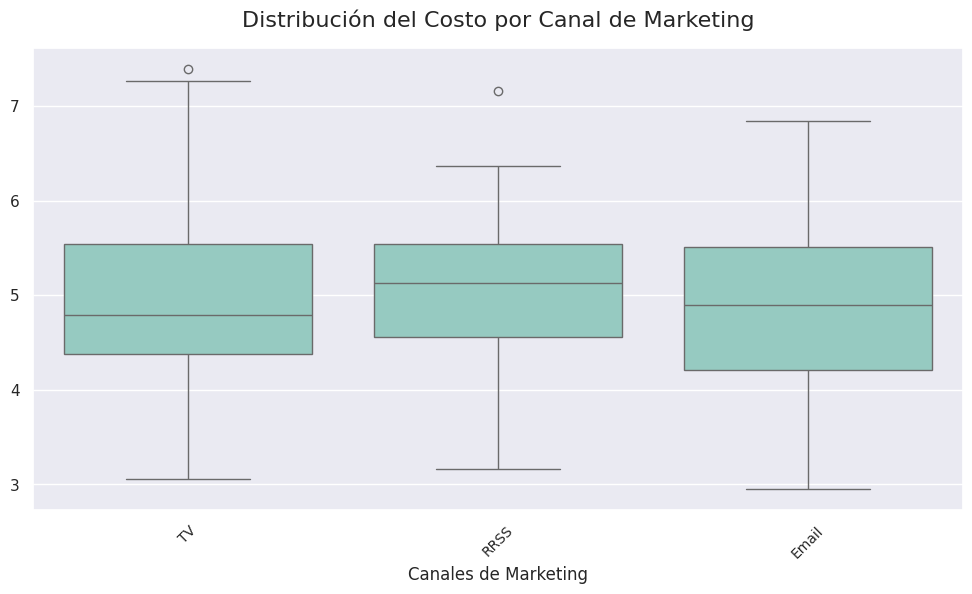

In [523]:
# Boxplot marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="Set3") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6))

# Graficamos
sns.boxplot(data=df_marketing, x="canal", y="costo")
# sns.boxplot(data=df_marketing, y="costo") # asi grafico costo para todos los canales

# Título y subtítulo
plt.title("Distribución del Costo por Canal de Marketing", fontsize=16, pad=15)

plt.xlabel("Canales de Marketing", fontsize=12)
plt.ylabel("")

# Rotación y tamaño de labels del eje X
plt.xticks(rotation=45, fontsize=10)

plt.show()



## 3 - Correlación

In [524]:
# Primero calculamos la matríz de correlación usando las variables numéricas
correlacion = df_ventas[['precio', 'cantidad', 'valor_venta']].corr() #.corr() calcula la matriz de correlacion
print("\nMatriz de correlación:")
print(correlacion)


Matriz de correlación:
               precio  cantidad  valor_venta
precio       1.000000 -0.002388     0.558846
cantidad    -0.002388  1.000000     0.773009
valor_venta  0.558846  0.773009     1.000000


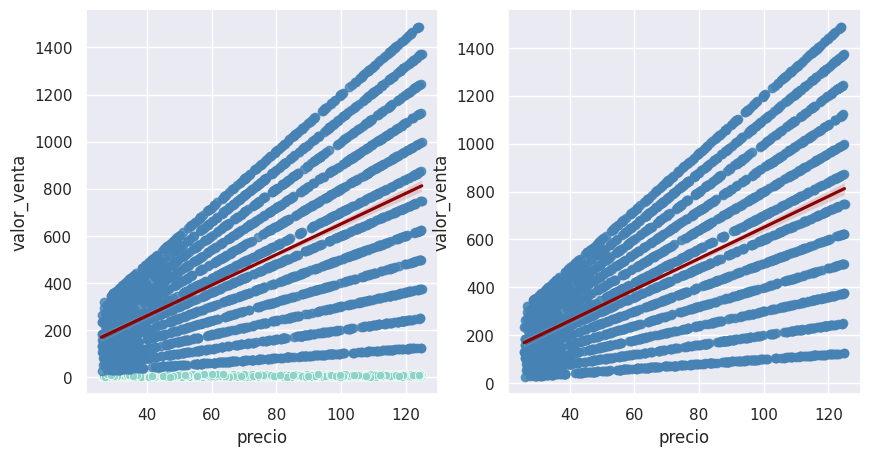

In [526]:
# Representamos las variables en un scatterplot o gráfico de dispersión
# Y agregamos una línea de tendencia

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_ventas, x="precio", y="cantidad")

# agrega una linea de regresion
sns.regplot(
    data=df_ventas,
    x="precio",
    y="valor_venta",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)

plt.subplot(1,2,2)
sns.scatterplot(data=df_ventas, x="precio", y="valor_venta")
sns.regplot(
    data=df_ventas,
    x="precio",
    y="valor_venta",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)


plt.show()

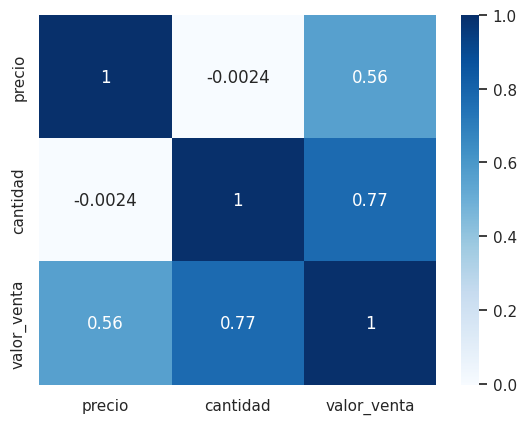

In [527]:
# Creamos un mapa de calor para representar la matríz de correlación
sns.heatmap(correlacion, annot=True, cmap="Blues") # cmap = Blues, Greens, rocket
plt.show()

## 4 - Consolidación de datos

Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.

<BR>
Aquí intervienen los KPIs, esto es, cuáles son las métricas que le interesan al negocio.

KPIs:
* Importe total de ventas concretado por mes
* Cantidad de productos totales vendidos por mes
* Volumen de venta por categorías
* Impacto de la campaña de marketing en las ventas

### Importe total de ventas concretado por mes

In [535]:
# Corramos un head para recordar el dataframe
df_ventas.head(10)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,mes
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,1
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,1
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,1
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,1
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,1
5,1697,Horno eléctrico,35.35,9,2024-01-02,Electrodomésticos,318.15,1
6,1710,Plancha de vapor,65.43,2,2024-01-02,Electrodomésticos,130.86,1
7,2959,Proyector,88.17,9,2024-01-02,Electrónica,793.53,1
8,318,Rincón de plantas,79.86,11,2024-01-03,Decoración,878.46,1
9,419,Candelabro,66.11,8,2024-01-03,Decoración,528.88,1


In [532]:
# Generamos primero la columna mes
df_ventas["mes"] = df_ventas["fecha_venta"].dt.month

# Agrupamos por mes y agregamos por valor_venta
ventas_mes = df_ventas.groupby("mes", as_index=False).agg(
    ventas_mes=("valor_venta", "sum")
)

# Renombramos la columna si fuera necesario
# ventas_mes = ventas_mes.rename(columns={
#     "mes": "mes",
#     "ventas_totales": "ventas_totales"
# })

# Visualizamos
ventas_mes.head()

,mes,ventas_mes
0,1,129604.99
1,2,118672.44
2,3,136779.15
3,4,128430.69
4,5,143727.25


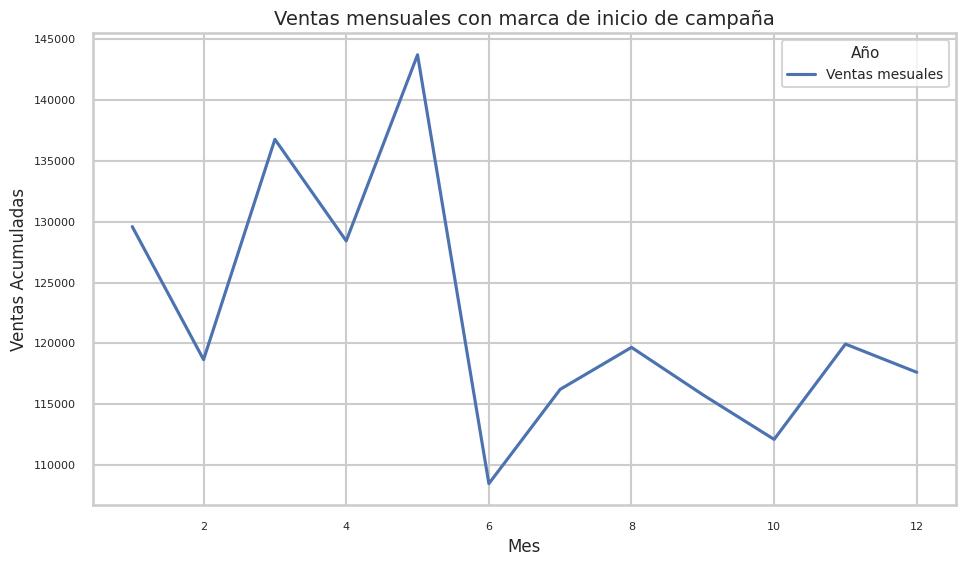

In [533]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=ventas_mes, x="mes", y="ventas_mes", label="Ventas mesuales" )

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

### Cantidad de productos totales vendidos por mes

In [536]:
# Agrupamos por mes y agregamos por cantidad
cantidades_mes = df_ventas.groupby("mes", as_index=False).agg(
    cantidad_mes=("cantidad", "sum")
)

# Visualizamos
cantidades_mes.head()

,mes,cantidad_mes
0,1,1741
1,2,1607
2,3,1792
3,4,1715
4,5,1812


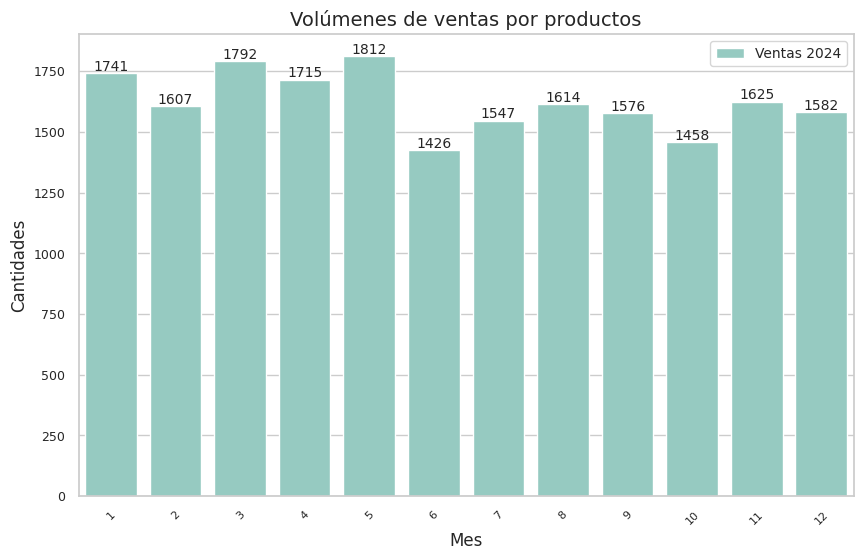

In [537]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(10,6))

# Crear el barplot
ax = sns.barplot(data=cantidades_mes, x='mes', y='cantidad_mes', label="Ventas 2024", width=0.8)

# Agregar etiquetas arriba de las barras
for i, valor in enumerate(cantidades_mes['cantidad_mes']):
    ax.text(
        i,                       # posición x de la etiqueta
        valor + 10,                   # posición y (ligeramente arriba de la barra)
        str(valor),              # texto
        ha='center', fontsize=10
    )

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', rotation=45,  labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por productos', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidades')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Volumen de venta por categorías

In [538]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,mes
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,1
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,1
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,1
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,1
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,1


In [539]:
# Agrupamos por categoría y agregamos por valor_venta
ventas_categoria = df_ventas.groupby("categoria", as_index=False).agg(
    ventas_totales=("valor_venta", "sum")
)

# Visualizamos
ventas_categoria.head()

,categoria,ventas_totales
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


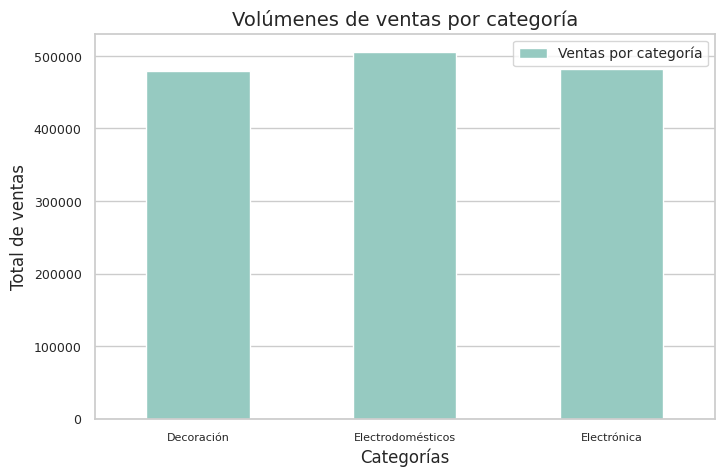

In [540]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(8,5))

# Crear el barplot
ax = sns.barplot(data=ventas_categoria, x='categoria', y='ventas_totales', label="Ventas por categoría", width=0.5)


# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por categoría', fontsize=14)
plt.xlabel('Categorías')
plt.ylabel('Total de ventas')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Impacto de la campaña de marketing en las ventas I

Trazamos una linea vertical al primer grafico ventas por mes

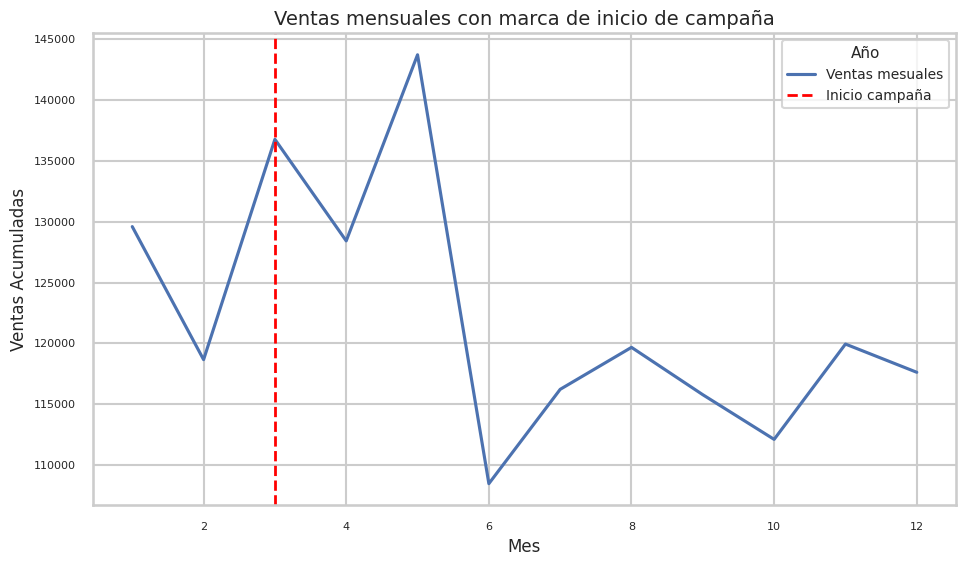

In [542]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=ventas_mes, x="mes", y="ventas_mes", label="Ventas mesuales" )

# línea vertical que marque el inicio de campaña
plt.axvline(3, color="red", linewidth=2, linestyle="--",
            label="Inicio campaña")

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

### Impacto de la campaña de marketing en las ventas II

Revisar la sección Etaoa 2 - Integración de datos
Allí, luego de unir los dataframes df_ventas con df_marketing, se generan 2 dataframes independientes, cada uno conteniendo las ventas que se hicieron dentro de algún período de marketing, y otro con las ventas que se realizaron fuera de camapaña.
<BR>
Así surgen:
* ventas_con_marketing_final
* ventas_sin_marketing_final

In [543]:
ventas_con_marketing_final.head()

,producto,ventas_producto_cm,costo_marketing,ganacia_producto_cm
4,Batidora,23460.35,227.32,23233.03
9,Cuadro decorativo,19293.71,195.51,19098.20
3,Auriculares,18181.01,212.75,17968.26
21,Parlantes Bluetooth,17942.96,144.45,17798.51
19,Lámpara de mesa,17925.37,235.19,17690.18


In [544]:
ventas_sin_marketing_final.head()

,producto,ventas_producto_sm
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60


In [545]:
ventas_con_sin_marketing = pd.merge(ventas_con_marketing_final, ventas_sin_marketing_final, on="producto", how="inner")
ventas_con_sin_marketing = ventas_con_sin_marketing.sort_values(by=["ventas_producto_cm"], ascending=False)
ventas_con_sin_marketing.head()

,producto,ventas_producto_cm,costo_marketing,ganacia_producto_cm,ventas_producto_sm
0,Batidora,23460.35,227.32,23233.03,50979.20
1,Cuadro decorativo,19293.71,195.51,19098.20,54297.60
2,Auriculares,18181.01,212.75,17968.26,74175.58
3,Parlantes Bluetooth,17942.96,144.45,17798.51,47779.46
4,Lámpara de mesa,17925.37,235.19,17690.18,82276.38


In [546]:
# Transformar a formato largo
df_long = ventas_con_sin_marketing[["producto","ventas_producto_cm", "ventas_producto_sm"]]
df_long = df_long.melt(id_vars="producto",
                        var_name="modalidad",
                        value_name="valores")
# df_long = df_long.sort_values(by=["valores", "modalidad"], ascending=True)
df_long.head()

,producto,modalidad,valores
0,Batidora,ventas_producto_cm,23460.35
1,Cuadro decorativo,ventas_producto_cm,19293.71
2,Auriculares,ventas_producto_cm,18181.01
3,Parlantes Bluetooth,ventas_producto_cm,17942.96
4,Lámpara de mesa,ventas_producto_cm,17925.37


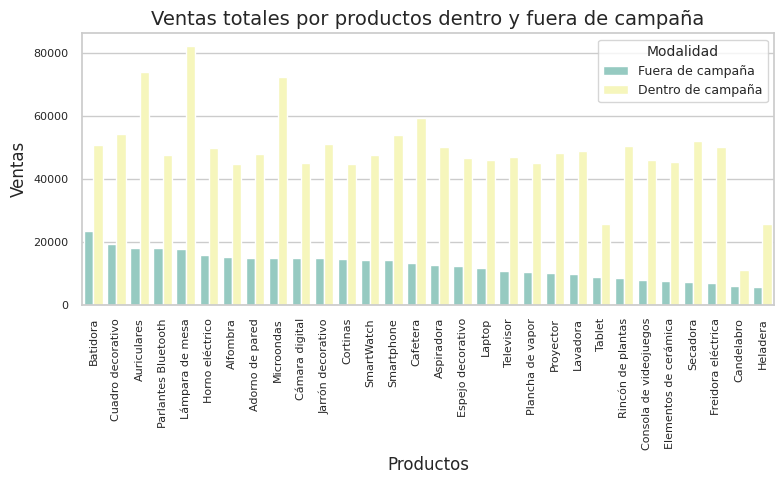

In [547]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos el lienzo
plt.figure(figsize=(8,5))

# Graficamos
sns.barplot(data=df_long, x="producto", y="valores", hue="modalidad", width=0.8)
# sns.barplot(data=df_long, x="Trimestre", y="Ventas", hue="Producto", width=0.8) Invertimos Productos por Trimestre


# Ticks (valores de eje)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas totales por productos dentro y fuera de campaña', fontsize=14)
plt.xlabel('Productos')
plt.ylabel('Ventas')

# Obtener handles (cuadritos de color) y labels originales del gráfico
handles, labels = plt.gca().get_legend_handles_labels()

# Reemplazar solo los textos de la leyenda, manteniendo colores
plt.legend(
    handles,
    ["Fuera de campaña", "Dentro de campaña"],
    title="Modalidad",
    fontsize=9,
    title_fontsize=10
)
plt.tight_layout()

In [ ]:
ventas_marketing.head()

In [ ]:
df_test = ventas_marketing.groupby(["id_venta", "producto"]).agg(
    {"valor_venta": "first"})
df_test1 = df_test.groupby("producto").agg(
    {"valor_venta": "sum"})

df_test2 = df_test1.sort_values(by="valor_venta", ascending=False)
df_test2.head()

In [ ]:
# Visualización con Plotly

## 4 - Presentación Final

Escribir aquí las observaciones, hallazgos y recomendaciones.